### Data source
[Johns Hopkins Github](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv)
### Reference 
[towardsdatascience]( https://towardsdatascience.com/data-exploration-with-the-covid-tracking-project-d89ac87342bc)          

In [1]:
## Data process
import pandas as pd
#path = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
#df=pd.read_csv(path,index_col=False)
df=pd.read_csv('time_series_covid19_confirmed_US.csv', header=0)
df.shape

(3261, 188)

In [2]:
df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20', '7/12/20',
       '7/13/20', '7/14/20', '7/15/20', '7/16/20'],
      dtype='object', length=188)

In [3]:
# subset columns
df=df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2','Country_Region','Lat', 'Long_','Combined_Key'], axis=1)
df.head(3)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,303,307,309,310,310,310,312,312,313,314
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,31,31,31,31,33,33,33,36,36,37


In [4]:
# stack data from wide to long
df.set_index("Province_State",inplace =True)
df=df.stack().reset_index()
df.head(3)

,Province_State,level_1,0
0,American Samoa,1/22/20,0
1,American Samoa,1/23/20,0
2,American Samoa,1/24/20,0


In [5]:
# change data from wide to long
df.rename(columns={'level_1':'date',0:"cases"}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.head(3)

,Province_State,date,cases
0,American Samoa,2020-01-22,0
1,American Samoa,2020-01-23,0
2,American Samoa,2020-01-24,0


## group cases by state

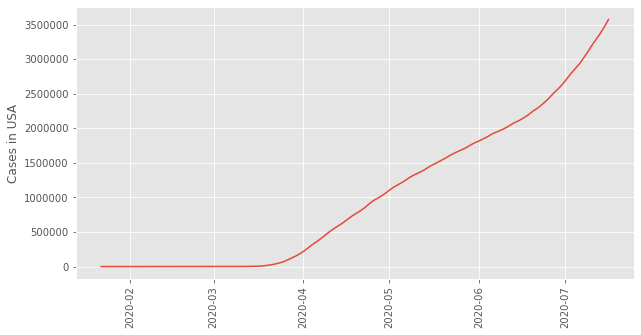

In [6]:
casesByState=df.groupby("date").cases.sum()
casesByState=casesByState.to_frame().reset_index()
casesByState.rename(columns={'cases':'agg_cases'}, inplace=True)

# plot data
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.plot(casesByState.date,casesByState.agg_cases)
plt.xticks(rotation=90)
plt.ylabel("Cases in USA")
plt.show();

## compare Florida with the rest of US 

        date  ISFLUS  cases
0 2020-01-22      FL      0
1 2020-01-22  others      1
2 2020-01-23      FL      0


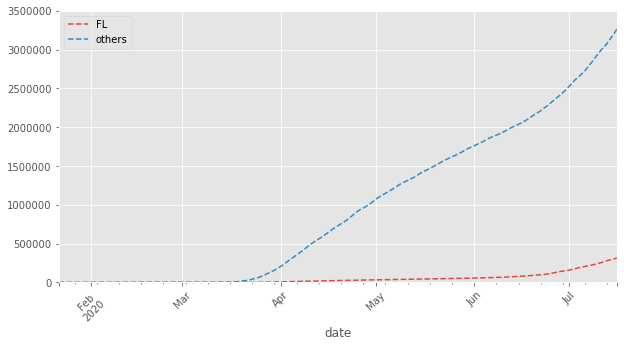

In [7]:
plt.figure(figsize=(10,5))
df['ISFLUS']=df['Province_State'].apply(lambda x: "FL" if x=="Florida" else 'others')
FL_vs_others=df.groupby(["date","ISFLUS"]).cases.sum().reset_index()
print(FL_vs_others.head(3))
#plot
FL_vs_others.set_index('date').groupby('ISFLUS')['cases'].plot(style='--', legend=True,rot=45, ylim=(0,3500000));


## mark the timeline

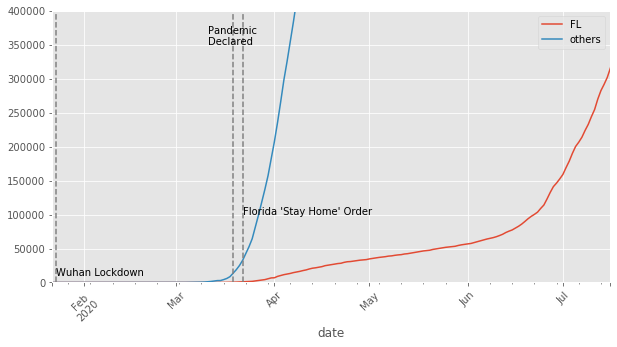

In [8]:
plt.figure(figsize=(10,5))
FL_vs_others.set_index('date').groupby('ISFLUS')['cases'].plot(legend=True,rot=45, ylim=(0,400000));

plt.axvline(x='2020-01-23' , color="grey", linestyle="--");
plt.text('2020-01-23', 10000, "Wuhan Lockdown")

plt.axvline(x='2020-03-19' , color="grey", linestyle="--");
plt.text('2020-03-11', 350000, "Pandemic\nDeclared")

plt.axvline(x='2020-03-22' , color="grey", linestyle="--");
plt.text('2020-03-22', 100000, "Florida 'Stay Home' Order");

## Top hit states as of July 16

           date Province_State   cases
1767 2020-07-16       New York  404775
1761 2020-07-16     California  364706
1762 2020-07-16        Florida  315775
1769 2020-07-16          Texas  305854
1763 2020-07-16       Illinois  159082
1760 2020-07-16        Arizona  134613
1764 2020-07-16  Massachusetts  112581
1768 2020-07-16   Pennsylvania  103075
1765 2020-07-16       Michigan   79839
1766 2020-07-16         Nevada   31915


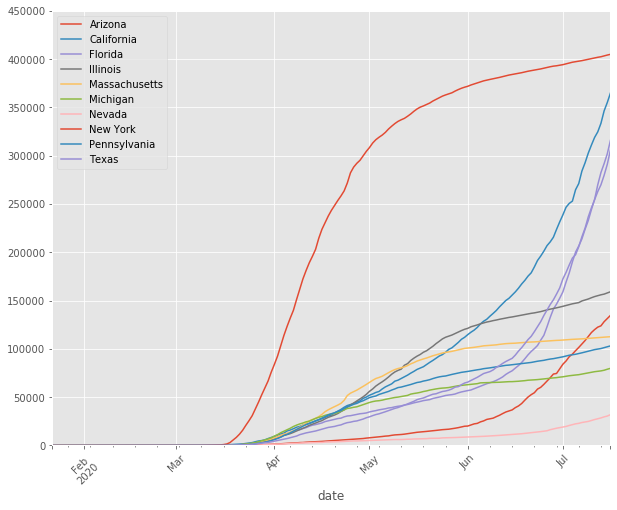

In [9]:
top20=df[df.date=='2020-07-16'].sort_values('cases',ascending=False)['Province_State'].head(20)
dftop20=df[df['Province_State'].isin(top20)]

dftop20=dftop20.groupby(["date","Province_State"]).cases.sum().reset_index()
print(dftop20[dftop20.date=='2020-07-16'].sort_values(by=['cases'],ascending=False))
plt.figure(figsize=(10,8))
dftop20.set_index('date').groupby('Province_State')['cases'].plot(legend=True,rot=45, ylim=(0,450000));